In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
#Import dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from DatasetManager import DatasetManager
from Dataset import Dataset


In [6]:
dataset_manager = DatasetManager()
dataset_manager.load_dataframe('main','../all-data.csv')


In [4]:
from gensim.models import KeyedVectors
data_path = '../data/GoogleNews-vectors-negative300.bin'

word2vec_model = KeyedVectors.load_word2vec_format(data_path, binary=True)


In [50]:
dataset01.save_dataset('fn01.csv')

In [24]:

dataset_manager.load_dataframe('unbalanced','../data/financial_news_1.csv')
dataset_manager.load_dataframe('balanced','../data/financial_news_2.csv')



Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to C:/Users/Rober/.cache/huggingface/datasets/csv/default-946bef0335356cf8/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to C:/Users/Rober/.cache/huggingface/datasets/csv/default-8dd87a4684db96a2/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
dataset_manager.create_dataset('unbalanced_dataset', '../data/financial_news_1.csv')
dataset_manager.create_dataset('balanced_dataset', '../data/financial_news_2.csv')



In [8]:
emb = dataset_manager['balanced'].get_embeddings(word2vec_model=word2vec_model)
split_dict = dataset_manager['balanced'].train_val_test_split(emb)


In [9]:
from ModelManager import ModelManager
model_manager = ModelManager() 

In [11]:
model_config_1 = {
    'model_name': 'LSTM_Model_1',
    'units': 32,
    'dropout_rate': 0.2,
    'return_sequences_config': False,
    'dense_units': 3,
    'activation': 'sigmoid',
    'output_activation': 'softmax',
    'optimizer': 'adam',
    'loss': 'categorical_crossentropy',
    'epochs': 30,
    'batch_size': 32,
}

model_config_2 = {
    'model_name': 'LSTM_Model_2',
    'units': 32,
    'dropout_rate': 0.2,
    'return_sequences_config': False,
    'dense_units': 3,
    'activation': 'sigmoid',
    'output_activation': 'softmax',
    'optimizer': 'adam',
    'loss': 'categorical_crossentropy',
    'epochs': 30,
    'batch_size': 10,
    'metrics': ['accuracy'],
}

model_manager.run_model_config(split_dict, model_config_1)
model_manager.run_model_config(split_dict, model_config_2)




Epoch 1/30
46/46 [==============================] - 1s 15ms/step - loss: 1.1260 - accuracy: 0.3251 - val_loss: 1.1031 - val_accuracy: 0.3352
Epoch 2/30
46/46 [==============================] - 1s 11ms/step - loss: 1.1248 - accuracy: 0.3230 - val_loss: 1.0978 - val_accuracy: 0.3626
Epoch 3/30
46/46 [==============================] - 1s 11ms/step - loss: 1.1104 - accuracy: 0.3444 - val_loss: 1.0986 - val_accuracy: 0.3352
Epoch 4/30
46/46 [==============================] - 1s 12ms/step - loss: 1.1235 - accuracy: 0.3244 - val_loss: 1.0999 - val_accuracy: 0.3352
Epoch 5/30
46/46 [==============================] - 1s 11ms/step - loss: 1.1108 - accuracy: 0.3271 - val_loss: 1.0992 - val_accuracy: 0.3352
Epoch 6/30
46/46 [==============================] - 1s 11ms/step - loss: 1.1059 - accuracy: 0.3409 - val_loss: 1.0972 - val_accuracy: 0.3626
Epoch 7/30
46/46 [==============================] - 0s 11ms/step - loss: 1.1097 - accuracy: 0.3188 - val_loss: 1.0987 - val_accuracy: 0.3352
Epoch 8/30
46

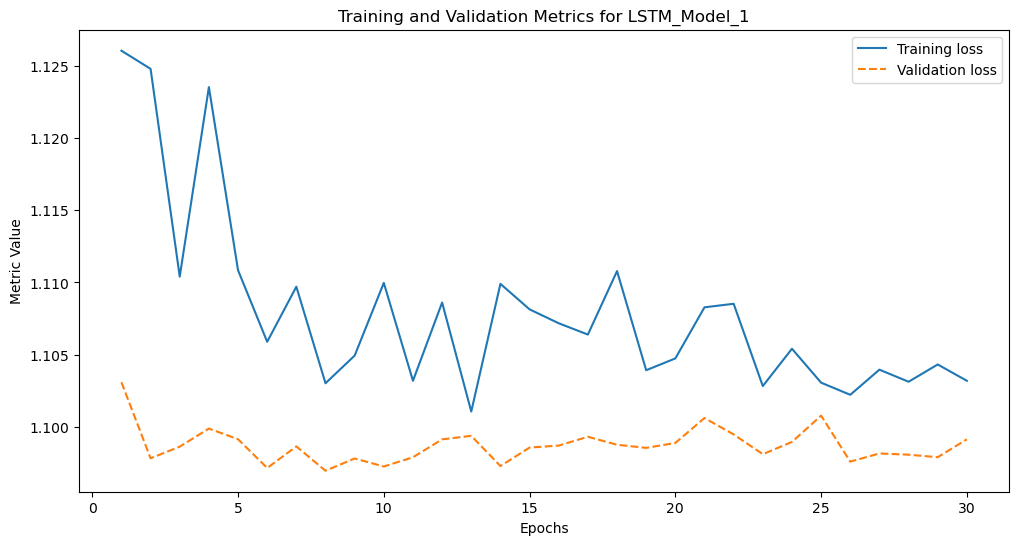

In [18]:
model_manager.plot_model_history('LSTM_Model_1')


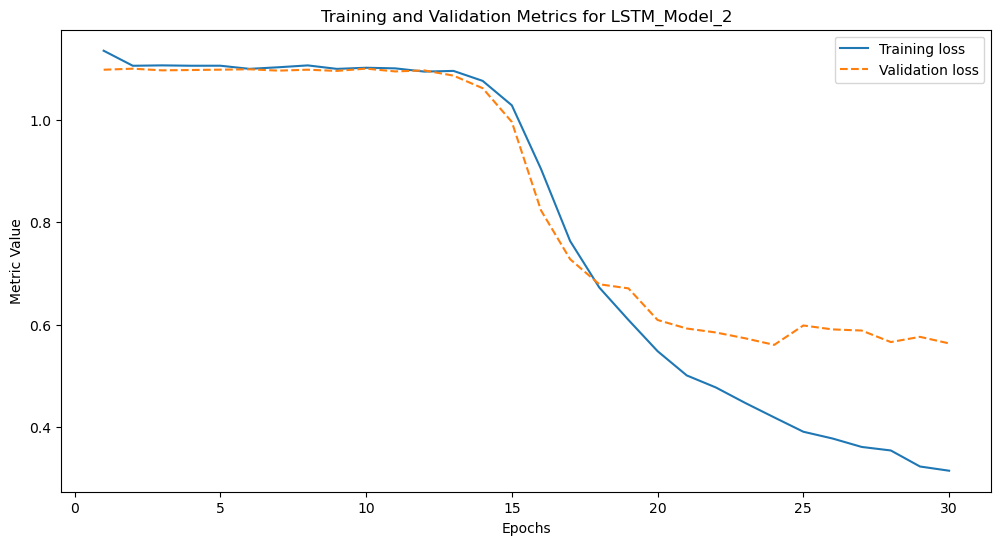

In [19]:
model_manager.plot_model_history('LSTM_Model_2')


In [26]:
y_pred_1 = model_manager.predict('LSTM_Model_1', split_dict['X_test'], return_class_indices=True)


6/6 [==============================] - 0s 6ms/step


In [21]:
model_manager.print_performance_metrics('LSTM_Model_1', split_dict['y_test'], y_pred_1, dataset_type='Imbalanced')


Accuracy Imbalanced data set for LSTM_Model_1: 0.27
F1 Score Imbalanced data set for LSTM_Model_1: 0.12


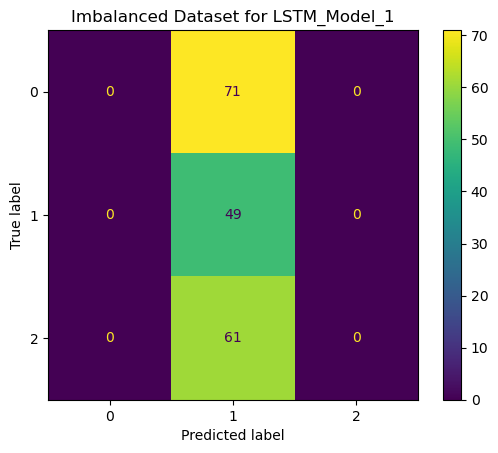

In [22]:
y_test_1_indices = split_dict['y_test'].argmax(axis=1)
model_manager.plot_confusion_matrix('LSTM_Model_1', y_test_1_indices, y_pred_1, title='Imbalanced Dataset')


In [28]:

dataset_manager.create_dataset('unbalanced_dataset', '../data/financial_news_1.csv')
dataset_manager.create_dataset('balanced_dataset', '../data/financial_news_2.csv')



  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
from DatasetProcesser import HFprocesser
hf1 = HFprocesser(dataset_manager.get_dataset('unbalanced_dataset'))
hf1 = HFprocesser(dataset_manager.get_dataset('unbalanced_dataset'))



DatasetDict({
    train: Dataset({
        features: ['label', 'news'],
        num_rows: 1812
    })
})